In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from stockfish import Stockfish
import chess
import chess.engine
import math
import random
from evaluation_pipeline_copy import *
from plot_functions import *
from scipy.special import rel_entr

In [2]:
# data = pd.read_csv('Valgte punkter fra ensemble')
df = pd.read_csv(r"chessData.csv")

In [67]:
data = generate_synthetic_data_dict(10,1,df,1)
data

['g2g4',
 'a7a3',
 'd2f1',
 'c8c7',
 'a6a5',
 'f3e3',
 'd8a5',
 'd5a5',
 'h6g7',
 'b4b2']

In [4]:
path=(r"stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe")

In [5]:
fen=(r"rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2")

In [68]:
moves = generate_synthetic_data_dict(10,4,df,1)

scores = ensemble_score(moves, df)
scores

[-640, -9956, -318, -269, -230, -284, -50, -893, -31, -455]

In [69]:
stockfish_score = stockfish_score_function(data, df)

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


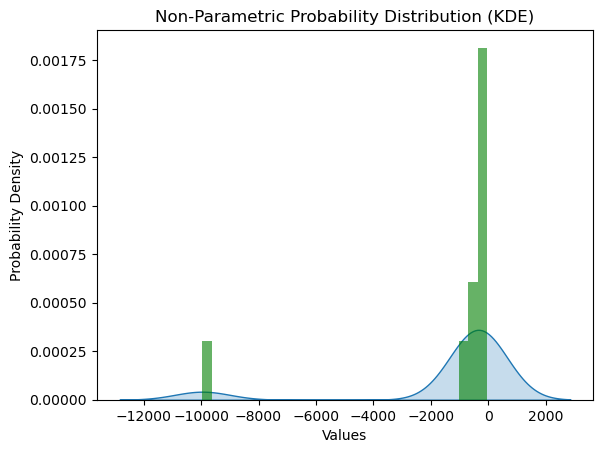

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


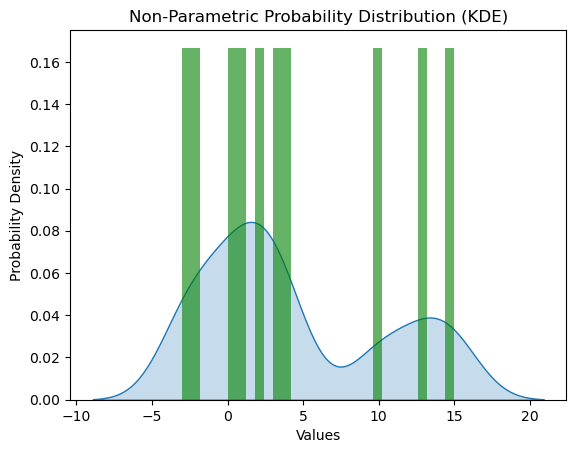

In [73]:
# Example usage
x_grid, kde_values_ensemble = distribution_plot(scores)
x_grid, kde_values_stockfish = distribution_plot(stockfish_score)

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


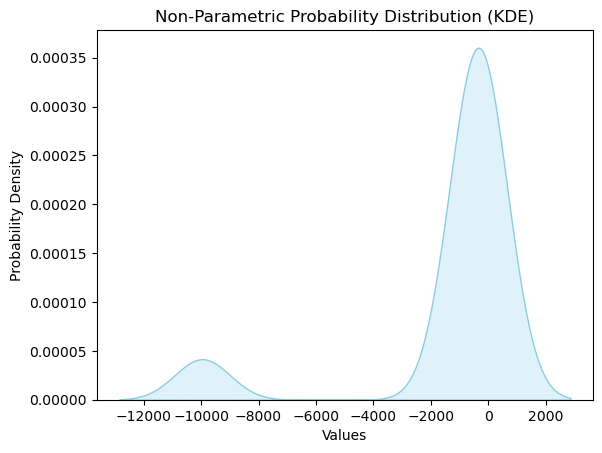

(array([-9956.        , -9946.06506507, -9936.13013013, -9926.1951952 ,
        -9916.26026026, -9906.32532533, -9896.39039039, -9886.45545546,
        -9876.52052052, -9866.58558559, -9856.65065065, -9846.71571572,
        -9836.78078078, -9826.84584585, -9816.91091091, -9806.97597598,
        -9797.04104104, -9787.10610611, -9777.17117117, -9767.23623624,
        -9757.3013013 , -9747.36636637, -9737.43143143, -9727.4964965 ,
        -9717.56156156, -9707.62662663, -9697.69169169, -9687.75675676,
        -9677.82182182, -9667.88688689, -9657.95195195, -9648.01701702,
        -9638.08208208, -9628.14714715, -9618.21221221, -9608.27727728,
        -9598.34234234, -9588.40740741, -9578.47247247, -9568.53753754,
        -9558.6026026 , -9548.66766767, -9538.73273273, -9528.7977978 ,
        -9518.86286286, -9508.92792793, -9498.99299299, -9489.05805806,
        -9479.12312312, -9469.18818819, -9459.25325325, -9449.31831832,
        -9439.38338338, -9429.44844845, -9419.51351351, -9409.57

In [105]:
distribution_plot(scores, label1='Ensemble score')

c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nunni\miniconda3\envs\venv-fagprojekt\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([-9956.        , -9946.06506507, -9936.13013013, -9926.1951952 ,
        -9916.26026026, -9906.32532533, -9896.39039039, -9886.45545546,
        -9876.52052052, -9866.58558559, -9856.65065065, -9846.71571572,
        -9836.78078078, -9826.84584585, -9816.91091091, -9806.97597598,
        -9797.04104104, -9787.10610611, -9777.17117117, -9767.23623624,
        -9757.3013013 , -9747.36636637, -9737.43143143, -9727.4964965 ,
        -9717.56156156, -9707.62662663, -9697.69169169, -9687.75675676,
        -9677.82182182, -9667.88688689, -9657.95195195, -9648.01701702,
        -9638.08208208, -9628.14714715, -9618.21221221, -9608.27727728,
        -9598.34234234, -9588.40740741, -9578.47247247, -9568.53753754,
        -9558.6026026 , -9548.66766767, -9538.73273273, -9528.7977978 ,
        -9518.86286286, -9508.92792793, -9498.99299299, -9489.05805806,
        -9479.12312312, -9469.18818819, -9459.25325325, -9449.31831832,
        -9439.38338338, -9429.44844845, -9419.51351351, -9409.57

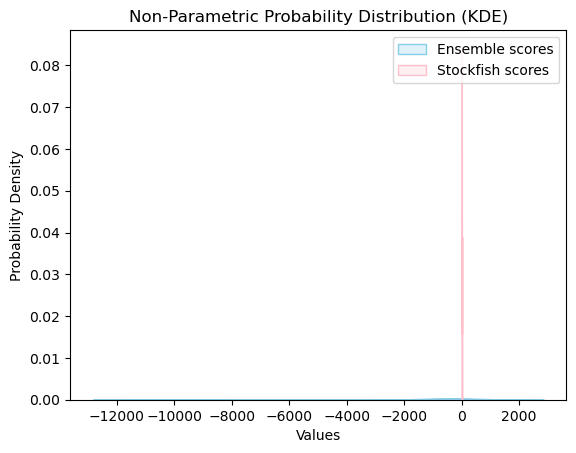

In [109]:
distribution_plot(scores, stockfish_score, label1 = 'Ensemble scores', label2='Stockfish scores')

In [75]:
values1 = kde_values_ensemble
values2 = kde_values_stockfish

KL = sum(-rel_entr(values1, values2))
KL

0.3208835480101364